## 랜덤포레스트

### 1. 랜덤포레스트란?

&nbsp;&nbsp;&nbsp; 직전 글에서 살펴보았듯, 의사결정 나무는 과적합과 불안정성이라는 한계점을 갖고 있습니다. 이를 보완하기 위해 여러 나무로 숲을 만드는 방법이 떠오르게 되었습니다. 그렇게 등장한 모델이 랜덤 포레스트로, 말 그대로 데이터를 무작위로 여러번 추출해 트리를 만들고 그 결과를 추합해서 예측 혹은 분류를 수행합니다. 이를 제대로 알기 위해 먼저 랜덤 포레스트의 기본이 되는 앙상블 기법과 배깅에 대해 살펴보도록 하겠습니다.


### 2. 앙상블 기법과 배깅

&nbsp;&nbsp;&nbsp; **1)앙상블 :** 앙상블 기법은 여러 개별 모델을 결합해서 하나의 강력한 모델을 만드는 기법입니다. 이를 통해 단일 모델을 사용했을 시보다 정확성을 높일 수 있는데요. 여러 모델을 활용할 수록 각 결과 값이 다를 가능성이 높아질 수밖에 없는데, 수치형 데이터의 경우 전체 값들의 평균치를 통해, 범주형 데이터의 경우 다수결을 통해 최종 결과를 산출해냅니다.

&nbsp;&nbsp;&nbsp; **2)앙상블 기법의 종류**

&nbsp;&nbsp;&nbsp; **(1)배깅(Bagging) :** 원 데이터에서 크기가 같은 표본을 여러번 단순 임의 복원 추출, 즉 추출한 데이터를 원본에 다시 넣고 전체에 대해 같은 크기의 표본을 다시 추출하는 과정을 수십, 수백회 반복하면서 여러 트리를 만들고(bootstrapping) 전체 결과를 평균(aggregating)해내는 방법입니다. 여러 트리를 활용하기 때문에 의사결정나무와 달리 과적합의 위험이 적습니다.

&nbsp;&nbsp;&nbsp;각 트리는 가지치기(spruning)를 하지 않고 최대로 성장하게 하는데, 그래서 개별적으로는 분산이 커지지만 전체 결과에 대한 평균을 내면 편향값을 증가시키지 않고도 분산 값을 낮춘다는 특징이 있습니다. 또한 원본 데이터에서 복원추출을 하기 대문에 모집단의 특성을 잘 반영합니다.

&nbsp;&nbsp;&nbsp; **(2)부스팅(참고) :** 배깅과 유사하지만 표본을 다시 추출하는 과정에서 분류가 잘못된 데이터에 더 큰 가중치를 둔다는 것이 특징입니다. 즉, 이전 분류 결과를 활용해 각 데이터에 대한 추출 확률을 조절하고, 훈련오차를 빠르게 줄여나가면서 결과적으로 약한 모델들을 결합해서 강한 모델을 만들어냅니다. 이 때문에 배깅과 달리 각 트리가 독립적이지 않습니다. 

### 3. 랜덤포레스트 : 

&nbsp;&nbsp;&nbsp; 배깅에 무작위성을 더욱 추가한 것으로, 데이터 추출뿐만 아니라 각 트리를 분할할 때 사용되는 특성(feature)도 무작위로 선정합니다. 가령, 전체 특성이 10개라면 각 노드에서 분할할 때 임의로 선택된 3개의 특성만을 활용합니다. 배깅에서의 여러 트리가 원본 데이터의 특성에 따라 유사한 방식으로 분할될 수 있는 반면, 랜덤 포레스트는 특성도 무작위로 추출하기 때문에 트리 간 상관 관계가 적고 다양성도 큽니다. 이처럼 의사결정나무의 장점을 극대화하고 보완했기 때문에 성능이 좋고 많이 쓰는 모델입니다.

### 4. 장단점

&nbsp;&nbsp;&nbsp;-과적합을 피할 수 있습니다(의사결정나무 단점 보완).

&nbsp;&nbsp;&nbsp;-이상치에 견고하고 스케일링이 필요하지 않습니다(의사결정나무의 특징)

&nbsp;&nbsp;&nbsp;-변수 중요도를 추출해 모델 해석에 중요한 특징을 파악할 수 있습니다.

&nbsp;&nbsp;&nbsp;-정확도가 좋습니다

&nbsp;&nbsp;&nbsp;-해석이 어렵고, 여러 트리를 사용하기 때문에 컴퓨터 리소스가 많이 필요합니다.



### 4. 참고 자료

&nbsp;&nbsp;&nbsp; https://blog.naver.com/rnjsgur5718/223273855815



### 5. 캐글 코드 분석 및 실습

&nbsp;&nbsp;&nbsp;-코드 출처 : https://www.kaggle.com/code/melikedilekci/diabetes-dataset-for-beginners



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [4]:
data = pd.read_csv('C:/Users/neddy/Documents/GitHub/머신러닝학습/diabetes.csv')

### EDA

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


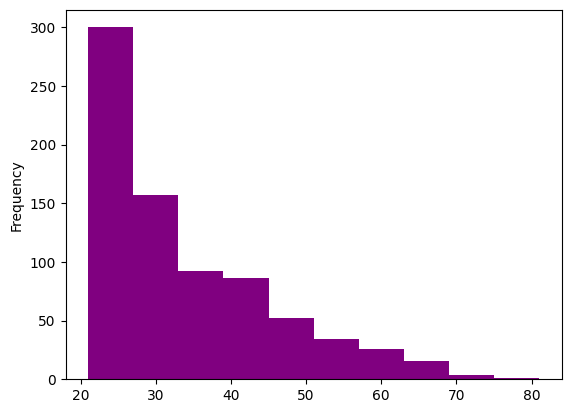

In [11]:
data.Age.plot(color='purple', kind='hist')
plt.show()

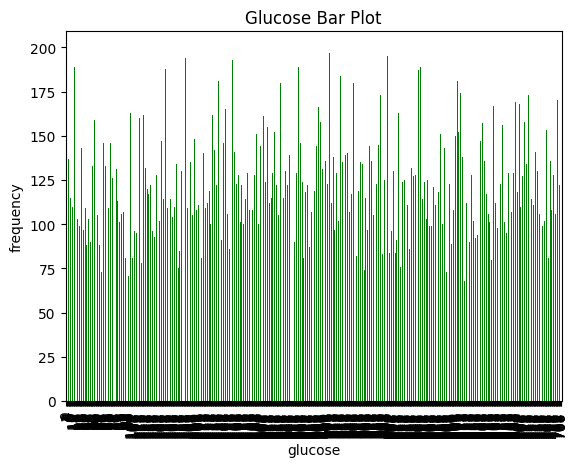

In [12]:
data.Glucose.plot(color = 'green', kind='bar')
plt.xlabel('glucose')
plt.ylabel('frequency')
plt.title('Glucose Bar Plot')
plt.show()

C:\Users\neddy\AppData\Local\Temp\ipykernel_4768\3444044839.py:1: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=data,x="Age",y="BMI",color="blue",split=False,cut=0,bw=.3, inner="stick")


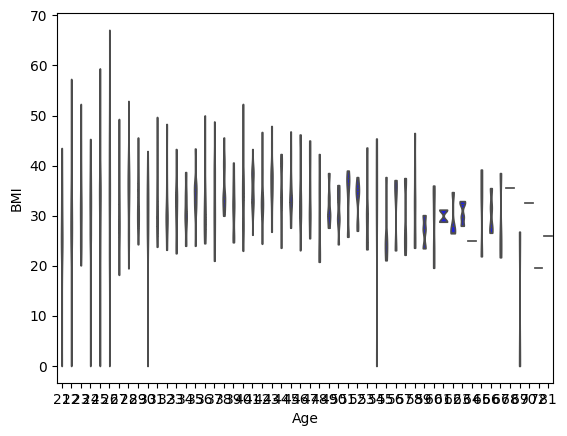

In [13]:
sns.violinplot(data=data,x="Age",y="BMI",color="blue",split=False,cut=0,bw=.3, inner="stick")
plt.show()

C:\Users\neddy\AppData\Local\Temp\ipykernel_4768\3102913245.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot ( data= data ["BMI"], color="pink", split=False, cut=0, bw=.3, inner="stick", scale="count")
C:\Users\neddy\AppData\Local\Temp\ipykernel_4768\3102913245.py:1: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot ( data= data ["BMI"], color="pink", split=False, cut=0, bw=.3, inner="stick", scale="count")


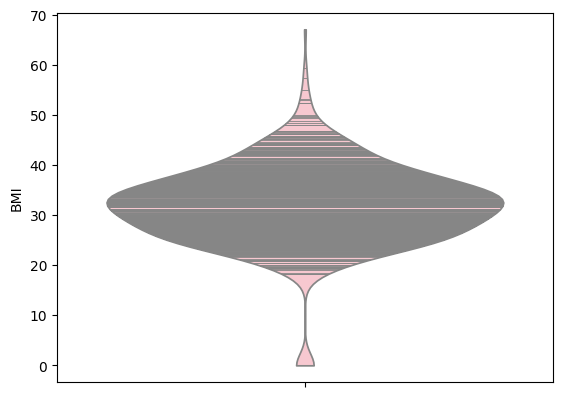

In [14]:
sns.violinplot ( data= data ["BMI"], color="pink", split=False, cut=0, bw=.3, inner="stick", scale="count")
plt.show()

In [15]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

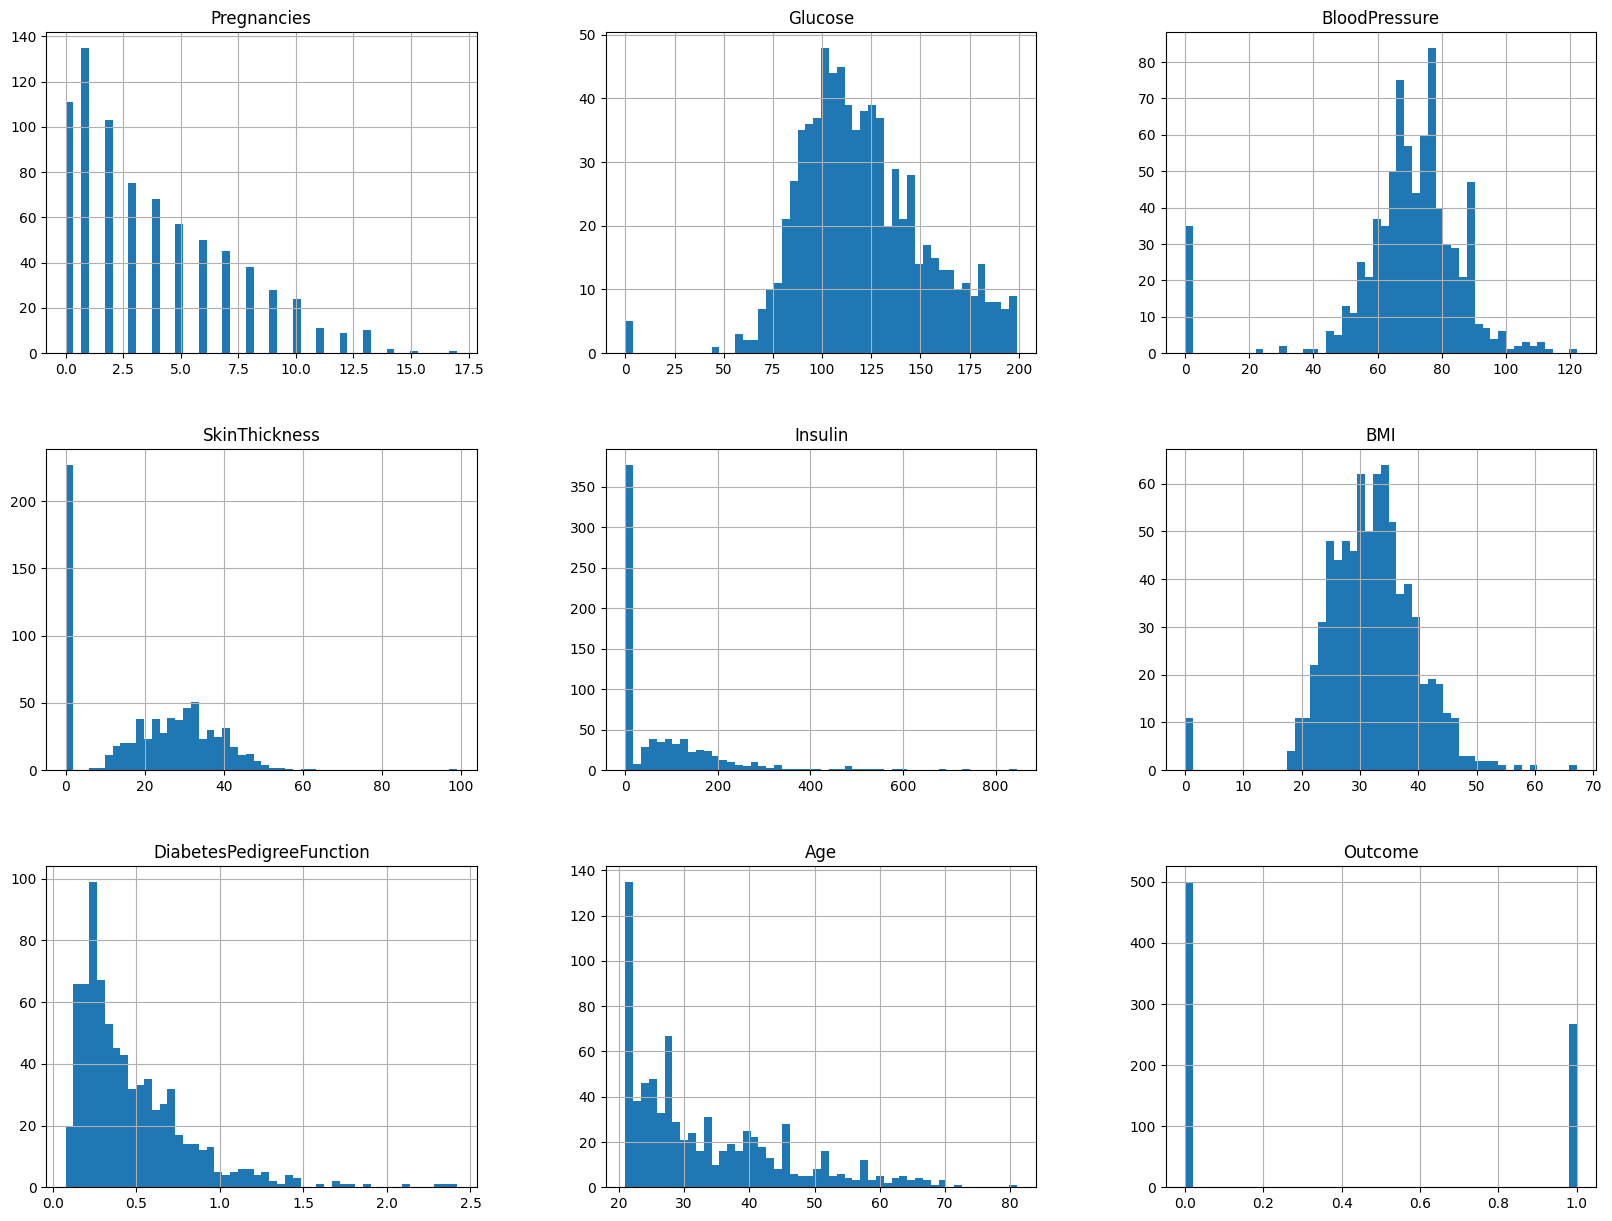

In [16]:
data.hist(bins=50, figsize=(20,15)) 
plt.show()

In [17]:
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.1, random_state=42)    # Create, random train and test set


train_df_labels = train_df["Outcome"].copy()                                  # Drop labels
train_df= train_df.drop("Outcome", axis=1) 

### 파이프라인을 사용한 전처리 : 
&nbsp;&nbsp;&nbsp;-파이파라인을 통해 여러 데이터를 간편하게 일관되게 전처리 할 수 있음

&nbsp;&nbsp;&nbsp;**1)코드 간소화 :** 여러 단계의 전처리 과정을 하나의 객체로 묶어줌으로써 코드가 간결해지고 가독성이 높아집니다. 각 단계에서 수행해야 할 작업을 따로따로 호출할 필요 없이, 파이프라인 하나로 처리할 수 있습니다.

&nbsp;&nbsp;&nbsp;**2)일관성 유지 :** 훈련 데이터와 테스트 데이터에 동일한 전처리 과정을 적용할 수 있습니다.전처리 과정에서 발생할 수 있는 실수를 줄여줍니다.


&nbsp;&nbsp;&nbsp;**3)편리한 관리 :** 파이프라인을 사용하면 전처리 과정이 체계적으로 관리되며, 각각의 전처리 단계가 독립적으로 유지됩니다.
새로운 전처리 단계나 변환기를 추가하거나 제거하기가 용이합니다.


&nbsp;&nbsp;&nbsp;**4)하이퍼파라미터 튜닝 :** 파이프라인을 사용하면 교차 검증이나 그리드 서치와 같은 하이퍼파라미터 튜닝 과정에서 전처리 단계를 포함한 전체 프로세스를 최적화할 수 있습니다.
GridSearchCV나 RandomizedSearchCV를 사용할 때 전처리 단계의 하이퍼파라미터도 함께 튜닝할 수 있습니다.


&nbsp;&nbsp;&nbsp;**5)재사용성 :** 동일한 파이프라인을 다른 데이터셋에 쉽게 적용할 수 있습니다.
다양한 전처리 방법을 조합하여 여러 가지 파이프라인을 시도해볼 수 있습니다.



## 랜덤포레스트와 전처리

&nbsp;&nbsp;&nbsp;앞서 살펴보았듯, 트리 기반 모델인 랜덤 포레스트는 스케일링이 필수적이지 않습니다. 하지만 다음과 같은 경우에 전처리가 사용되기도 합니다.

&nbsp;&nbsp;&nbsp;**1)다양한 모델 사용 :** 만약 파이프라인에서 다른 모델(예: 선형 회귀, SVM)도 함께 사용한다면, 전처리를 통해 모든 모델에 대해 일관된 입력을 제공하는 것이 유리합니다.

&nbsp;&nbsp;&nbsp;**2)성능 향상 :** 데이터의 특성에 따라 전처리가 랜덤 포레스트의 성능을 향상시킬 수 있습니다. 예를 들어, 아주 큰 값과 작은 값이 섞여 있는 경우, 스케일링이 도움이 될 수 있습니다.

&nbsp;&nbsp;&nbsp;**3)Feature Importance 해석 :** 전처리를 통해 모든 특성이 동일한 스케일에 있을 때, 특성 중요도(feature importance)를 해석하는 것이 더 직관적일 수 있습니다.


In [20]:
#Transformation Pipelines 

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler                       # This method makes normalization to our features

num_pipeline = Pipeline([('std_scaler', StandardScaler()), ])

train_prepared = num_pipeline.fit_transform(train_df)

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_prepared, train_df_labels)

y_probas_forest = cross_val_predict(forest_clf, train_prepared, train_df_labels, cv= 3, method = "predict_proba")

In [49]:

accuracy_scores = cross_val_score(forest_clf, train_prepared, train_df_labels, cv=3, scoring="accuracy")

# 평균 정확도 점수 출력
print("Cross-validated accuracy scores:", accuracy_scores)
print("Mean cross-validated accuracy score:", accuracy_scores.mean())

Cross-validated accuracy scores: [0.78787879 0.79565217 0.73043478]
Mean cross-validated accuracy score: 0.7713219148001755


### 교차검증

&nbsp;&nbsp;&nbsp;교차 검증(cross-validation)은 기계 학습 모델의 성능을 평가하는 유용한 방법 중 하나입니다. 주로 모델의 일반화 성능을 평가하고, 과적합을 방지하는 데 사용됩니다. 모델을 개발할 때 학습 데이터와 평가 데이터를 분리하여 사용하는 것이 일반적이지만, 이는 데이터의 특정 부분에 따라 결과가 달라질 수 있습니다. 교차 검증은 이러한 문제를 해결하기 위해 데이터를 여러 번 반복하여 나누고 평가하는 방법입니다.

**교차 검증 과정**

&nbsp;&nbsp;&nbsp; **1)데이터 분할 :** 주어진 데이터를 여러 개의 부분 집합(폴드, fold)으로 나눕니다. 예를 들어, 데이터를 k개의 폴드로 나눌 수 있습니다.

&nbsp;&nbsp;&nbsp; **2)모델 학습 및 평가 :** k개의 폴드 중 하나를 선택하여 검증 세트(validation set)로 사용하고, 나머지 k-1개 폴드를 학습 세트(training set)로 사용하여 모델을 학습시킵니다.
이 과정을 k번 반복하여 각 폴드가 한 번씩 검증 세트가 되도록 합니다.


&nbsp;&nbsp;&nbsp; **3)성능 평가 :** 각 폴드에 대해 모델의 성능을 평가하고, 이를 평균하여 최종 성능을 평가합니다. 일반적으로 정확도(accuracy), 정밀도(precision), 재현율(recall), F1 점수(F1 score) 등의 평가 지표를 사용합니다.


**교차 검증의 장점**

&nbsp;&nbsp;&nbsp; **1)일반화 성능 평가 :** 테스트 데이터에 대해 과적합 없이 모델의 성능을 더 정확하게 예측할 수 있습니다.

&nbsp;&nbsp;&nbsp; **2)데이터 효율성 :** 전체 데이터를 효과적으로 활용하여 모델을 학습하고 평가할 수 있습니다.

&nbsp;&nbsp;&nbsp; **3)신뢰성 :** 데이터 분할에 따라 모델 평가 결과가 변동할 수 있는 문제를 완화합니다.


**교차 검증 방법**

&nbsp;&nbsp;&nbsp;1)k-Fold Cross-Validation: 데이터를 k개의 폴드로 나누고, 각 반복에서 하나의 폴드가 검증 세트가 되도록 합니다.

&nbsp;&nbsp;&nbsp;2)Stratified k-Fold Cross-Validation: 클래스의 비율을 유지하면서 k-Fold를 수행합니다. 클래스 불균형 데이터셋에서 유용합니다.

&nbsp;&nbsp;&nbsp;3)Leave-One-Out Cross-Validation (LOOCV): 각 반복에서 하나의 데이터 포인트가 검증 세트가 되도록 합니다. 데이터가 매우 작을 때 유용합니다.

&nbsp;&nbsp;&nbsp;4)Shuffle-Split Cross-Validation: 임의의 훈련 및 검증 세트를 여러 번 반복하는 방식으로, 대규모 데이터셋에서 유용합니다.


**cross_val_predict 함수**

cross_val_predict 함수는 교차 검증을 통해 예측을 수행하고 그 결과를 반환하는 함수입니다. 예측값을 얻는 목적으로 사용되며, 각 폴드에서 얻은 예측값을 합쳐서 최종 예측값을 얻을 수 있습니다. 이 함수는 모델을 훈련시키는 것이 아니라, 예측값을 얻는 데 사용됩니다.

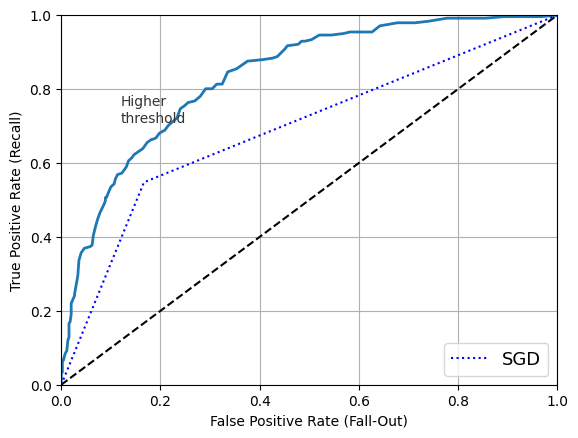

In [51]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_df_labels, y_scores_forest)


plt.plot(fpr_forest, tpr_forest, linewidth=2, label=None)

plt.plot(fpr, tpr, "b:", label="SGD") 
plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


plt.show()

### ROC 곡선

ROC 곡선: x축은 FPR(거짓 양성 비율), y축은 TPR(진짜 양성 비율)을 나타냅니다.

대각선 점선: 랜덤 모델의 ROC 곡선을 나타내며, 분류기가 무작위로 예측하는 경우의 성능을 나타냅니다. 이 점선 위에 있는 곡선은 랜덤 모델보다 더 좋은 성능을 가진 모델을 나타냅니다.

SGD 곡선: 파란 점선("b:")은 SGD 분류기의 ROC 곡선을 나타냅니다. 이 곡선과 랜덤 포레스트의 ROC 곡선을 비교하여 각 모델의 성능을 비교할 수 있습니다.

"Higher threshold" 텍스트: 임계값을 높이면 양성 클래스로 분류되는 샘플이 줄어들어 FPR이 감소하고, TPR도 함께 감소함을 나타냅니다.